## Insurance Expense Prediction
Data Source: https://www.kaggle.com/mirichoi0218/insurance

Author: Tawsif Hasan

Date Last Updated: 3-Aug-2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#Import the insurance data
data = pd.read_csv('insurance.csv')

#Check the first 7 rows of the data
data.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


In [3]:
#Check the shape of the data set
data.shape

(1338, 7)

In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


### Exploratory Data Analysis

In [6]:
#Set Seaborn Style Palette
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

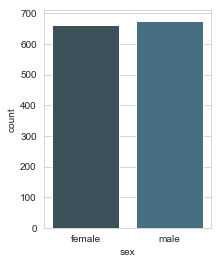

In [7]:
fig, ax = plt.subplots(figsize = (3, 4))

sns.countplot(x='sex',data=data)

plt.show()

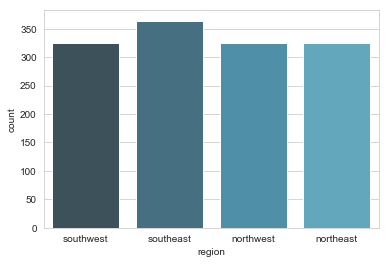

In [8]:
fig, ax = plt.subplots(figsize = (6, 4))

sns.countplot(x='region',data=data)

plt.show()

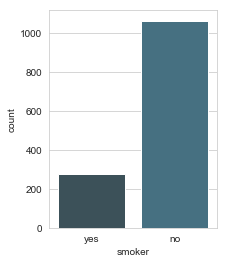

In [9]:
fig, ax = plt.subplots(figsize = (3, 4))

sns.countplot(x='smoker',data=data)

plt.show()

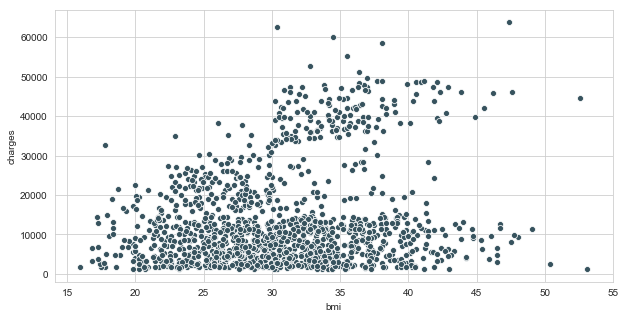

In [10]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.scatterplot(x='bmi', y = 'charges', data=data)

plt.show()

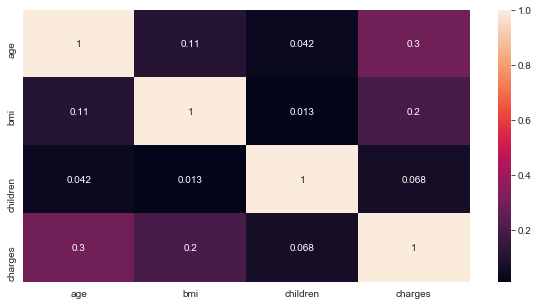

In [11]:
#Plotting the correlation matrix to compute correlation among all features in the dataframe. 
#The correlations can only be computed on numberical features
#If values are close to zero, then theres no correlation, close to 1 means features are correlated

fig, ax = plt.subplots(figsize = (10, 5))

corr = data.corr()
sns.heatmap(corr, annot = True, ax = ax)

plt.show()

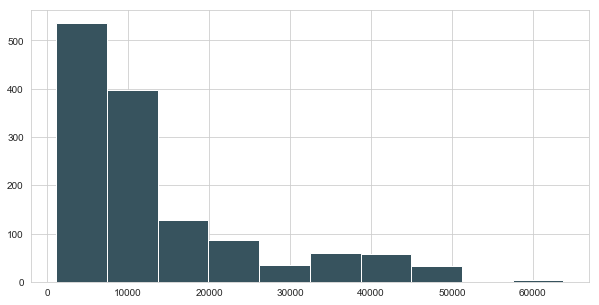

In [13]:
fig, ax = plt.subplots(figsize = (10, 5))

plt.hist(data["charges"])

plt.show()

### Re-labeling Data

In [14]:
#Now I search for string type column in the dataset.
#These are the labels classified as 'Object' type.


d_types = dict(data.dtypes) #Create a new variables that takes the dictionary of datatypes from the data

#Loop Over the column name and type in d_types

for name, type_ in d_types.items(): #for column name and column type in items of d_types (variable that was created)
    if str(type_) == 'object': #if string type is object
        print (f"<===== {name} =====>") #this is only for ease of readability
        print(data[name].value_counts()) #print the name of the column and print the count of the class labels
        print()

<===== sex =====>
male      676
female    662
Name: sex, dtype: int64

<===== smoker =====>
no     1064
yes     274
Name: smoker, dtype: int64

<===== region =====>
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64



In [15]:
#we need to transform the string categorical variables such as sex, region and smoker into integers
#Label encoding will give a unique label to a unique value.
#this can be done using label encoder object from sci-kit learn preprocessing

from sklearn.preprocessing import LabelEncoder

#Relabeling sex, region and smoker features to unique numeric values

for name, type_ in d_types.items(): #loop over column name and data type in the items of d_types that we created
    if str(type_) == 'object': #If we encounter any string column
        Le = LabelEncoder() #then we instantiate a new object of Lable Encoding called Le
        data[name] = Le.fit_transform(data[name]) #and transform the column values with label encoded values.

In [16]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
#Might be a good idea to one hot encode region feature

#Lets try one hot encoding to the region feature

from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
part = onehotencoder.fit_transform(data['region'].values.reshape(-1, 1)).toarray()

values = dict(data['region'].value_counts())

for e, (val, _) in enumerate(values.items()):
    data['region_' + str(val)] = part[:, e]
    
data = data.drop(['region'], axis = 1)

In [18]:
data.head()

,age,sex,bmi,children,smoker,charges,region_2,region_3,region_1,region_0
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


### Training and Testing Data

In [19]:
#Target
y = data['charges'] 

#Feature

X = data[['age', 'sex','bmi', 'smoker', 'region_2', 'region_3', 'region_1', 'region_0']]


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the Model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train,y_train)

LinearRegression()

In [24]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  242.87066972   100.22393675   367.01583874 23478.65222673
   303.21006197   518.90337345  -285.7572899   -536.35614553]


In [25]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
age,242.870670
sex,100.223937
bmi,367.015839
smoker,23478.652227
region_2,303.210062
region_3,518.903373
region_1,-285.757290
region_0,-536.356146


In [26]:
#Model Intercept
#Look at the model intercept
lm.intercept_

-12427.125252344542

### Predicting on Test Data

In [27]:
y_pred = lm.predict(X_test)

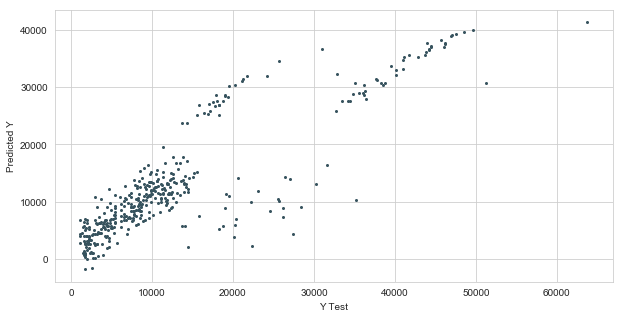

In [29]:
fig, ax = plt.subplots(figsize = (10, 5))

plt.scatter(y_test,y_pred, 4)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

plt.show()

### Residuals

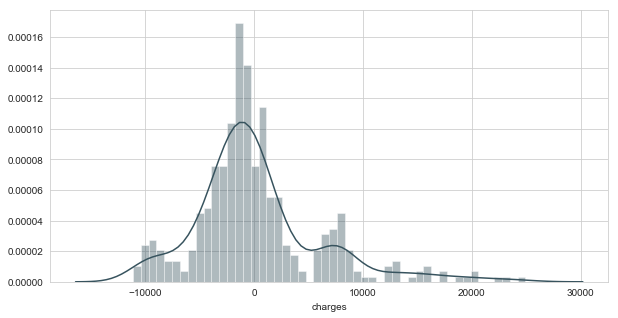

In [30]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.distplot((y_test-y_pred),bins=50);

plt.show()

### Evaluating the Model

In [31]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4025.738186428267
MSE: 33970595.006397665
RMSE: 5828.42989203762


In [32]:
lm.score(X_test, y_test)

0.7581771179863781

##### Horrible Model! Let's try again

### Data Transformation

Skewness in Column : Charges  1.5158796580240388


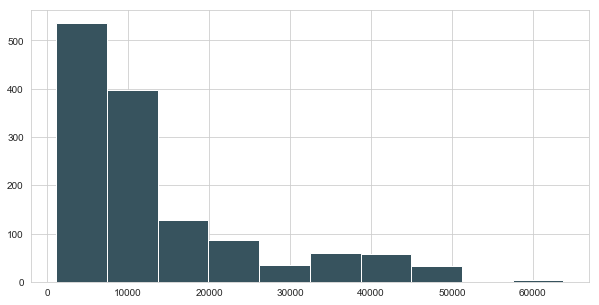

In [33]:
fig, ax = plt.subplots(figsize = (10, 5))

print("Skewness in Column : Charges " , data["charges"].skew())

plt.hist(data["charges"])
plt.show()

Skewness in Column : Log Charges -0.09009752473024583


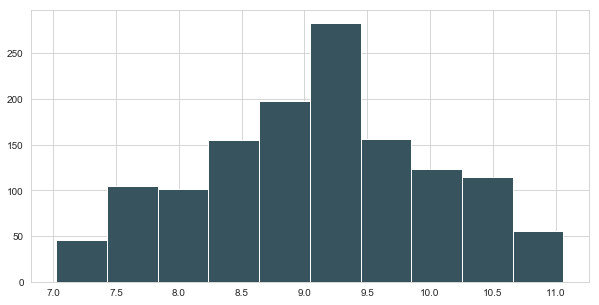

In [34]:
fig, ax = plt.subplots(figsize = (10, 5))

log_charges = np.log(data["charges"])
print("Skewness in Column : Log Charges" , log_charges.skew())

plt.hist(log_charges)
plt.show()

In [35]:
#Add the log of charges in the dataframe
data['log_charges'] = np.log(data['charges'])

### Train Test Split

In [36]:
#Target
y = data['log_charges'] 

#Feature

X = data[['age', 'sex','bmi', 'smoker', 'region_2', 'region_3', 'region_1', 'region_0']]

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

### Standardization of Training and Test Splits

In [38]:
#Now we standardize the data using standard scaler
#It transforms the data in such a manner so that it has mean 0 and standard deviation as 1 
#which is normal distribution.

#This can be done using the standard scaler object from Scikit Learn

from sklearn.preprocessing import StandardScaler

#Standardization using standard scaler

Scaler = StandardScaler() #Instantiate standard scaler
X_train = Scaler.fit_transform(X_train) #fit standard scaler into training set
X_test = Scaler.transform(X_test) #transform testing data using the same object

In [39]:
X_train.shape, X_test.shape

((936, 8), (402, 8))

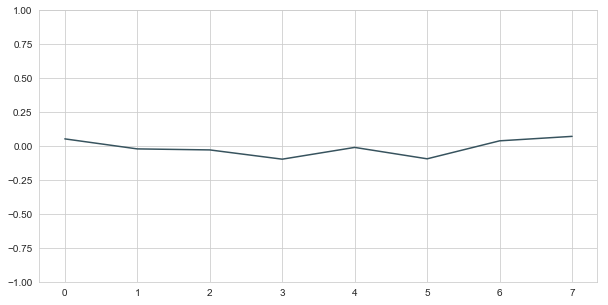

In [41]:
#Validate data standardization. Mean should be 1

#We plot the mean of each column in the test set. 

#The mean fluctuates between -0.25 and 0 meaning, values in test set and train set are quite similar

fig, ax = plt.subplots(figsize = (10, 5))

plt.ylim(-1,1)

means = []

for i in range(X.shape[1]):
    means.append(np.mean(X_test[:, i]))
    
plt.plot(means, scaley = False)

plt.show()

#The mean fluctuates between -0.25 and 0 meaning, values in test set and train set are quite similar

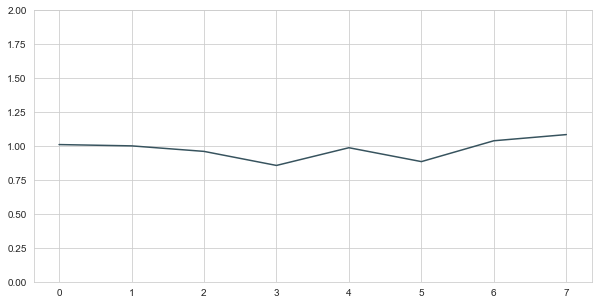

In [42]:
#check standard deviation of each column in the test set.

#We see that it fluctuates between 0.75 and 1.05 which means the variance of test set and tran set are quite similar

fig, ax = plt.subplots(figsize = (10, 5))

plt.ylim(0, 2)

vars = []

for i in range(X.shape[1]):
    vars.append(np.var(X_test[:, i]))
    
plt.plot(vars, scaley = False)

plt.show()

In [43]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
lm = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lm, X, y, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.7897979  0.67185143 0.80702751 0.74760217 0.71507187]
Average 5-Fold CV Score: 0.7462701773424656


In [44]:
lm.fit(X_train,y_train)

LinearRegression()

In [45]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 0.47015807 -0.01597182  0.08963915  0.63031606  0.03257366  0.01926712
 -0.02395431 -0.02783775]


In [46]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
age,0.470158
sex,-0.015972
bmi,0.089639
smoker,0.630316
region_2,0.032574
region_3,0.019267
region_1,-0.023954
region_0,-0.027838


In [47]:
#Model Intercept
#Look at the model intercept
lm.intercept_

9.111524161886994

In [48]:
y_pred = lm.predict(X_test)

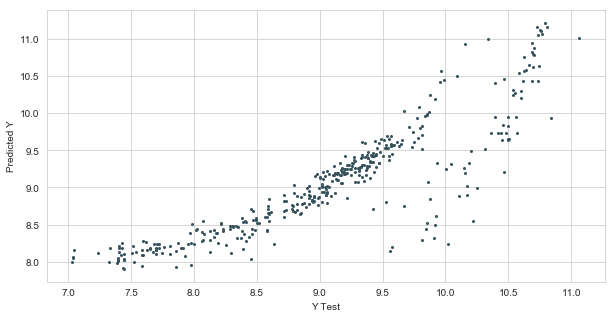

In [51]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.scatter(y_test,y_pred, 4)

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

plt.show()

In [52]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2848456358572997
MSE: 0.19089715924890102
RMSE: 0.43691779461232866


In [53]:
lm.score(X_test, y_test)

0.7699298478612941

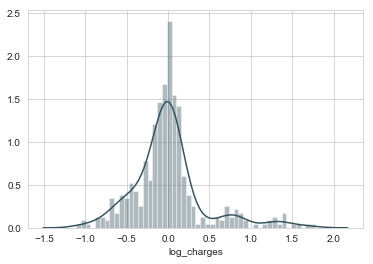

In [54]:
sns.distplot((y_test-y_pred), bins=50);

plt.show()

### Regularized Regression - Lasso

In [55]:
# Import Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, cv = 5)

lasso_regressor.fit(X, y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)



{'alpha': 1e-08}
0.7462701781109367


### Regularized Regression - Ridge

In [56]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, cv = 5)
ridge_regressor.fit(X, y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)



{'alpha': 0.01}
0.7462702245696218


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [58]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_ridge = ridge_regressor.predict(X_test)

In [59]:
print('Lasso Metrics:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

Lasso Metrics:
MAE: 0.2784411821040372
MSE: 0.18345053089358873
RMSE: 0.4283112546893774


In [60]:
print('Ridge Metrics:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))

Ridge Metrics:
MAE: 0.27844377102486567
MSE: 0.1834523150318129
RMSE: 0.4283133374432938


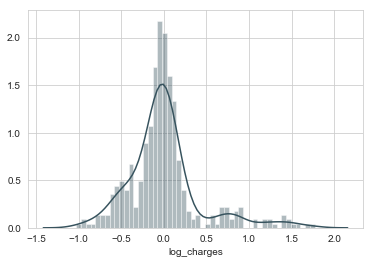

In [61]:
#visualize lasso residuals

sns.distplot((y_test-y_pred_lasso),bins=50);

plt.show()


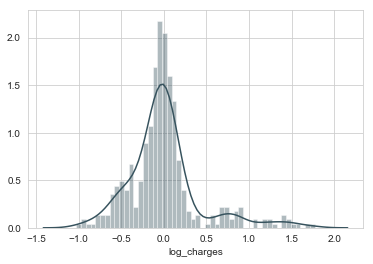

In [62]:
#visualize ridge residuals

sns.distplot((y_test-y_pred_ridge),bins=50);

plt.show()

### Hold out set in Regression

In [63]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)
    
# Predict on the test set and compute metrics

y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))
print("Tuned ElasticNet RMSE: {}".format(rmse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.41466881997949345
Tuned ElasticNet MSE: 0.5043629414322331
Tuned ElasticNet RMSE: 0.7101851458825601
